In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tweepy
from tweepy.parsers import JSONParser
from datetime import datetime
from yahoo_finance import Share
import sys
import requests as rq
import json

In [2]:
df = pd.read_csv("twiter_sentiment.csv", encoding =  'latin1')
df

,Unnamed: 0,Unnamed: 0.1,Restaurant Names,User Name,Follower Count,LA Sentiment,New York Sentiment,Houston Sentiment,San Francisco Sentiment,Orlando Sentiment
0,0,0,Red Lobster,redlobster,296664,0.119173,0.165480,0.165526666667,0.0414230769231,0.28401
1,1,1,SUBWAY®Restaurants,SUBWAY,2467427,0.093708,0.045293,0.247506666667,0.127289285714,0.019772
2,2,2,Eatalian Cafe,EATALIANCAFE,158,NaN,NaN,,,
3,3,3,In-N-Out Burger,innoutburger,44775,0.090203,0.158602,0.251908108108,0.116444186047,0.0339185185185
4,4,4,Hustler Casino,HUSTLERCASINOLA,2895,0.112589,NaN,,,
5,5,5,Roscoe's House of Chicken and Waffles,roscoesofficial,30909,0.124109,0.163340,,0.113797727273,
6,6,6,Little Caesars Pizza,littlecaesars,232112,0.131415,0.155874,0.209382692308,0.10885,0.113223076923
7,7,7,The Bicycle Hotel & Casino,BicycleCasino,9333,0.124884,NaN,,,
8,8,8,Chili's Grill & Bar,Chilis,383907,0.103989,0.168120,0.155562686567,0.153219672131,0.124233333333
9,9,9,Fatburger,Fatburger,14993,0.117890,0.172014,0.164108695652,0.15949516129,


In [3]:
df.dtypes


Unnamed: 0                   int64
Unnamed: 0.1                 int64
Restaurant Names            object
User Name                   object
Follower Count               int64
LA Sentiment               float64
New York Sentiment         float64
Houston Sentiment           object
San Francisco Sentiment     object
Orlando Sentiment           object
dtype: object

In [90]:
top5 = df.sort_values(by = "Follower Count", ascending = False).head()
top5

,Unnamed: 0,Unnamed: 0.1,Restaurant Names,User Name,Follower Count,LA Sentiment,New York Sentiment,Houston Sentiment,San Francisco Sentiment,Orlando Sentiment
22,22,22,Starbucks,Starbucks,11942459,0.064788,0.116074,0.0975545023697,0.228896907216,0.11902962963
19,19,19,McDonald's,McDonalds,3540391,0.063202,0.128534,0.0778900552486,0.233472727273,0.126127272727
1,1,1,SUBWAY®Restaurants,SUBWAY,2467427,0.093708,0.045293,0.247506666667,0.127289285714,0.019772
18,18,18,Wendy's,Wendys,2288957,0.069417,0.113820,0.102662650602,0.178944720497,0.130388535032
16,16,16,Taco Bell,tacobell,1888502,0.077948,0.104617,0.0989676470588,0.149825954198,0.1400140625


In [3]:
Consumer_Key = "FSfjjE3eU8euI2t2VUJGh009v"
Consumer_Secret = "B4NEEiXmBOnmJyHS5zo7VxbbMFvjw9DbglolN9c3Nj9ObQYZKU"
Access_Token = "942094172969828352-WCe9ZgRKy30MKWLFYfeWUtzJCCDft7G"
Access_Token_Secret = "XHab1ABIUXKIW2SQrWtH48HImrOHxKqfdwUxRbmUFvylm"


In [4]:
auth = tweepy.OAuthHandler(Consumer_Key, Consumer_Secret)
auth.set_access_token(Access_Token, Access_Token_Secret)

api = tweepy.API(auth, parser = JSONParser())

In [7]:
#target_user = "realdonaldtrump"

# Create array to record all date-times of tweets
# target users
top5List = {
    "Starbucks": [],
    "McDonalds" : [],
    "Subway" : [],
    "Wendys" : [],
    "Taco Bell" : []
}

# loop through 500 tweets
for page in range(5): # 20 x 25 = 500 tweets
    # get all tweets
    for user in top5List:
        public_tweets = api.user_timeline(user, page = page, parser=JSONParser())
        # loop throug all tweets
        for tweet in public_tweets:
            top5List[user].append(tweet["created_at"])


In [17]:
# # function to convert list of strings to datetime objects
# def convertDates(dataList):
#     dates_list = [datetime.strptime(date,"%a %b %d %H:%M:%S %z %Y").date() for date in dataList]
#     return dates_list

# # datetime.strptime(tweet_times[x], "%a %b %d %H:%M:%S %z %Y")
# sub = convertDates(top5List["Subway"])
# sub[0]



# Add each datetime object into the array
def convertDates3(dataList):
    tweet_time_objects = []


    for x in range(len(dataList)):
        tweet_datetime = datetime.strptime(dataList[x], "%a %b %d %H:%M:%S %z %Y")
#     tweet_datetime = datetime.strptime(tweet_times[x], "%a %b %d %H:%M:%S %z %Y")

        tweet_time_objects.append(tweet_datetime)
    return tweet_time_objects

    # Preview that datetimes are matching
#         print(top5List["Subway"][x])
#         print(tweet_datetime)

In [18]:
# covert all lists to datetime
subwayList = convertDates3(top5List["Subway"])
StarbucksList = convertDates3(top5List["Starbucks"])
McDonaldsList = convertDates3(top5List["McDonalds"])
WendysList = convertDates3(top5List["Wendys"])
Taco_BellList = convertDates3(top5List["Taco Bell"])

subwayList[0]

datetime.datetime(2018, 1, 13, 19, 9, 58, tzinfo=datetime.timezone.utc)

In [41]:
#for user in top5List:
    #for x in range(len(user)):
        #tweet_datetime = datetime.strptime(top5List[user][x], "%a %b %d %H:%M:%S %z %Y")
        #top5List[user].append(tweet_datetime)


In [38]:
def Differences(dif_list):
    list_rest2 = []

    for x in range(len(dif_list)-1):
        hrs_apart = ((dif_list[x] - dif_list[x+1]).seconds) / 3600
        list_rest2.append(hrs_apart)
    return list_rest2


In [40]:
subway_df = Differences(subwayList)
Starbuck_df = Differences(StarbucksList)
McDonalds_df = Differences(McDonaldsList)
Wendys_df = Differences(WendysList)
Taco_Bell = Differences(Taco_BellList)

In [19]:
list_rest = []
for x in range(len(subwayList)-1):
    hrs_apart = ((subwayList[x] - subwayList[x+1]).seconds) / 3600
    list_rest.append(hrs_apart)

#subwayList[2]-subwayList[3]

In [50]:
Subway = Differences(subwayList)
Starbucks = Differences(StarbucksList)
McDonalds = Differences(McDonaldsList)
Wendys = Differences(WendysList)
Taco_Bell = Differences(Taco_BellList)


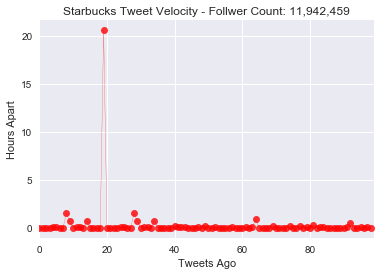

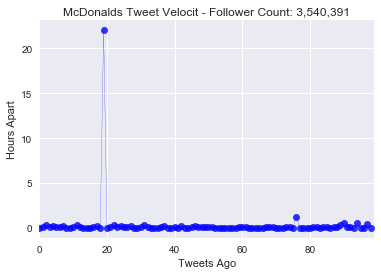

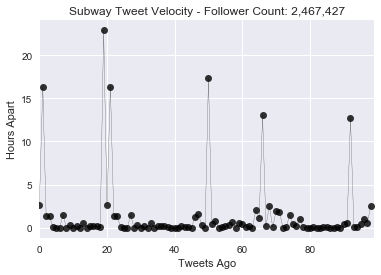

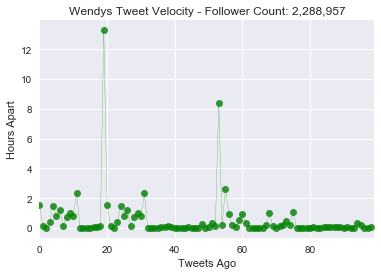

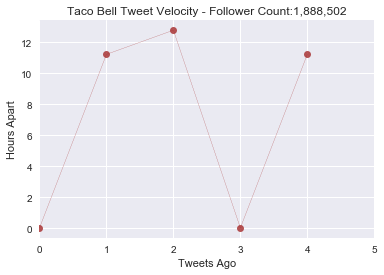

In [97]:
sns.set()
plt.plot(range(len(Starbucks)), Starbucks, marker="o",linewidth=0.25, alpha=0.8, color="r")
plt.xlim([0, len(Starbucks)])
plt.ylabel("Hours Apart")
plt.xlabel("Tweets Ago")
plt.title("Starbucks Tweet Velocity - Follwer Count: 11,942,459")
plt.savefig('Starbucks.png')
plt.show()


plt.plot(range(len(McDonalds)), McDonalds, marker="o",linewidth=0.25, alpha=0.8, color="b")
plt.xlim([0, len(McDonalds)])
plt.ylabel("Hours Apart")
plt.xlabel("Tweets Ago")
plt.title("McDonalds Tweet Velocit - Follower Count: 3,540,391")
plt.savefig('McDonalds.png')
plt.show()

plt.plot(range(len(Subway)), Subway, marker="o",linewidth=0.25, alpha=0.8, color="black")
plt.xlim([0, len(Subway)])
plt.ylabel("Hours Apart")
plt.xlabel("Tweets Ago")
plt.title("Subway Tweet Velocity - Follower Count: 2,467,427")
plt.savefig('Subway.png')
plt.show()

plt.plot(range(len(Wendys)), Wendys, marker="o",linewidth=0.25, alpha=0.8, color="green")
plt.xlim([0, len(Wendys)])
plt.ylabel("Hours Apart")
plt.xlabel("Tweets Ago")
plt.title("Wendys Tweet Velocity - Follower Count: 2,288,957")
plt.savefig('Wendys.png')
plt.show()

plt.plot(range(len(Taco_Bell)), Taco_Bell, marker="o",linewidth=0.25, alpha=0.8, color="brown")
plt.xlim([0, len(Taco_Bell)])
plt.ylabel("Hours Apart")
plt.xlabel("Tweets Ago")
plt.title("Taco Bell Tweet Velocity - Follower Count:1,888,502")
plt.savefig('TacobBell.png')
plt.show()

In [5]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [6]:
my_list = ["Starbucks", "McDonalds","Subway", "Wendys", "Taco Bell"]

In [88]:
def converter(rest_name):
    time_list3 = []
    compound = []
    for name in range(5):
        mcd = api.search(rest_name, rpp=1000, count=1000)
        for tweets in mcd['statuses']:
            time_list3.append(tweets['created_at'])
            tweet = tweets['text']
            compound.append(analyzer.polarity_scores(tweet)["compound"])
    new_time_list = []
    for x in time_list3:
        time = datetime.strptime(x, "%a %b %d %H:%M:%S %z %Y")
#     print(time)
        new_time_list.append(time)
    sns.set()
    plt.plot(new_time_list, compound)
    plt.gcf().autofmt_xdate()
    plt.show()

In [51]:
datetime.fromtimestamp("2018/01/19").isoformat()


TypeError: an integer is required (got type str)

In [129]:
st = pd.read_csv("HistoricalQuotes.csv")
#st.set_value(0, 'date', "2018/01/19")

In [86]:
st["date"] = pd.to_datetime(st["date"])


In [83]:
change = []
for x in range(len(st)-1):
    hrs_apart = (st['close'][x] - st['close'][x+1])
    change.append(hrs_apart)

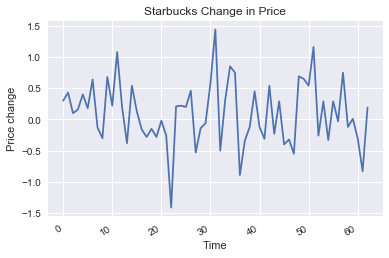

In [128]:
plt.plot(change)
#plt.xticks( st["date"], change)
plt.title("Starbucks Change in Price")
plt.ylabel("Price change")
plt.xlabel("Time")
plt.gcf().autofmt_xdate()
plt.savefig('Star-Changeprice.png')

plt.show()

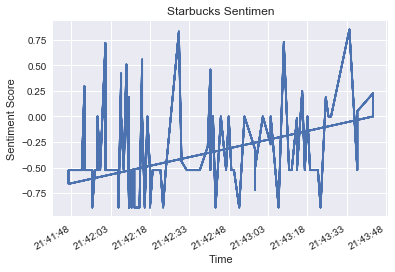

In [127]:
time_list3 = []
compound = []
for name in range(5):
    mcd = api.search("Starbucks", rpp=1000, count=1000)
    for tweets in mcd['statuses']:
        time_list3.append(tweets['created_at'])
        tweet = tweets['text']
        compound.append(analyzer.polarity_scores(tweet)["compound"])
    new_time_list = []
for x in time_list3:
    time = datetime.strptime(x, "%a %b %d %H:%M:%S %z %Y")
#     print(time)
    new_time_list.append(time)
sns.set()
plt.plot(new_time_list, compound)
plt.title("Starbucks Sentimen")
plt.ylabel("Sentiment Score")
plt.xlabel("Time")
plt.gcf().autofmt_xdate()
plt.savefig('Star-Change.png')

plt.show()